In [13]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [14]:
SMALL_SIZE = 22
MEDIUM_SIZE = 24
BIGGER_SIZE = 24

plt.rc('font', size=BIGGER_SIZE)         # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('axes', titlesize=BIGGER_SIZE)    # fontsize of the figure title

plt.rcParams["figure.figsize"] = (8, 6)
plt.rcParams['figure.dpi'] = 75
plt.rcParams['text.usetex'] = True

# Observer angle vs. wavelength
Light incident angle - 55 degrees

In [15]:
import glob

filenames = glob.glob("../data/CD/source_angle/55deg/*.csv")

In [38]:
from scipy.signal import savgol_filter

data = []
data_map = {}

for filename in filenames:
    angle_meas = float(filename.split("/")[-1].split('deg')[0])

    angle = 90 - angle_meas if angle_meas > 0 else -90 - angle_meas

    df = pd.read_csv(filename)
    # df['intensity'] = savgol_filter(df['intensity'], 10, 2)
    data.append([angle, df])
    data_map[angle] = df

In [39]:
from scipy.signal import find_peaks

df_map = {}

for field in data:
    angle = field[0]
    df = field[1]
    if angle > 0:
        peaks = [np.argmax(df['intensity'])]
    else:
        peaks, _ = find_peaks(df['intensity'], prominence=1, height=2, distance=80)

    df_map[angle] = df['wavelength'][peaks]

In [18]:
lambda_angle = lambda x, theta_i, k: 1.53e-6 * (np.sin(np.pi * x / 180) - np.sin(np.pi * theta_i / 180)) / k

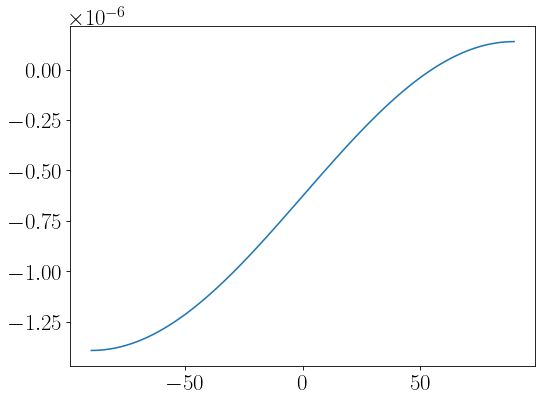

In [19]:
plt.plot(np.linspace(-90, 90, 100), lambda_angle(np.linspace(-90, 90, 100), 55, 2))

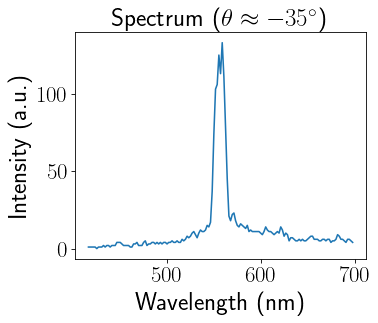

In [20]:
plt.rcParams["figure.figsize"] = (5, 4)
plt.plot(data_map[-37]['wavelength'], data_map[-37]['intensity'])
plt.xlabel('Wavelength (nm)')
plt.ylabel('Intensity (a.u.)')
plt.title("Spectrum ($\\theta \\approx -35^\\circ$)")
plt.savefig("spectrum_90.png", bbox_inches='tight')

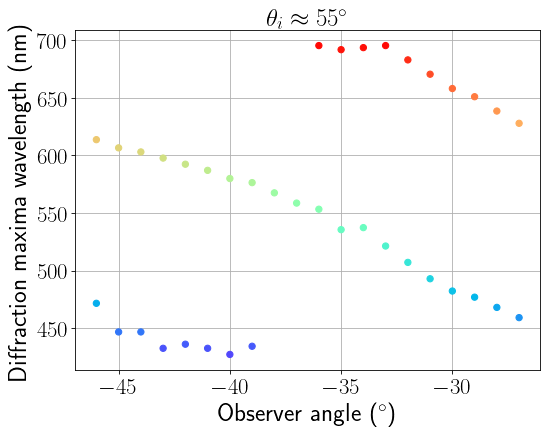

In [21]:
plt.rcParams["figure.figsize"] = (8, 6)

plot_x = []
plot_y = []

for angle, maximas in df_map.items():
    for maxima in maximas:
        if angle < 0:
            plot_x.append(angle)
            plot_y.append(maxima)

plot_function_x = np.linspace(np.min(plot_x), np.max(plot_x), 100)

plt.plot(plot_x, plot_y, linestyle='None', marker='None', color='black', zorder=1)
plt.scatter(plot_x, plot_y, c=plot_y, cmap="rainbow", vmin=400, vmax=700, zorder=2)
plt.grid()

plt.xlabel("Observer angle ($^\circ$)")
plt.ylabel("Diffraction maxima wavelength (nm)")

# plt.plot(np.linspace(-36, -27), lambda_angle(np.linspace(-36, -27), 55, -3) * 1e9, label='-3rd')
# plt.plot(plot_function_x, lambda_angle(plot_function_x, 55, -4) * 1e9, label='-4th')
# plt.plot(np.linspace(-46, -39), lambda_angle(np.linspace(-46, -39), 55, -5) * 1e9, label='-5th')
# plt.legend()
plt.title(r"$\theta_i \approx 55^\circ$")
plt.savefig('spectrometer_angle.png', bbox_inches='tight')

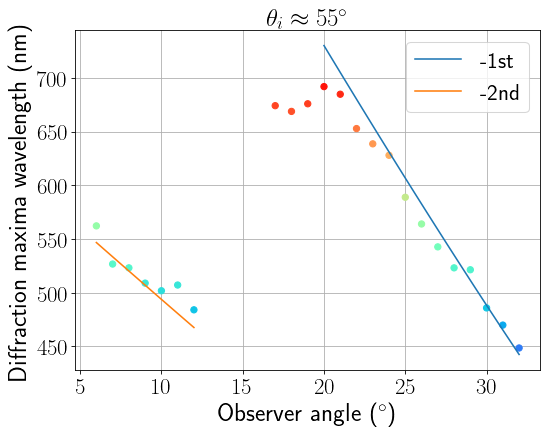

In [22]:
plt.rcParams["figure.figsize"] = (8, 6)

plot_x = []
plot_y = []

for angle, maximas in df_map.items():
    for maxima in maximas:
        if angle > 0:
            plot_x.append(angle)
            plot_y.append(maxima)

plot_function_x = np.linspace(np.min(plot_x), np.max(plot_x), 100)

plt.plot(plot_x, plot_y, linestyle='None', marker='None', color='black', zorder=1)
plt.scatter(plot_x, plot_y, c=plot_y, cmap="rainbow", vmin=400, vmax=700, zorder=2)
plt.grid()

plt.xlabel("Observer angle ($^\circ$)")
plt.ylabel("Diffraction maxima wavelength (nm)")

plt.plot(np.linspace(20, 32, 100), lambda_angle(np.linspace(20, 32, 100), 55, -1) * 1e9, label='-1st')
plt.plot(np.linspace(6, 12, 100), lambda_angle(np.linspace(6, 12, 100), 55, -2) * 1e9, label='-2nd')

plt.legend()

plt.title(r"$\theta_i \approx 55^\circ$")

plt.savefig("spectrometer_angle_positive.png")

# Multiple illumination angles
$50\,^\circ$, $55\,^\circ$

In [32]:
import glob

filenames_45deg = glob.glob("../data/CD/source_angle/45deg/*.csv")

In [33]:
from scipy.signal import savgol_filter

data_45deg = []
data_45deg_map = {}

for filename in filenames_45deg:
    angle_meas = float(filename.split("/")[-1].split('deg')[0])

    angle = 90 - angle_meas if angle_meas > 0 else -90 - angle_meas

    df = pd.read_csv(filename)
    # df['intensity'] = savgol_filter(df['intensity'], 10, 2)
    data_45deg.append([angle, df])
    data_45deg_map[angle] = df

In [34]:
from scipy.signal import find_peaks

df_45deg_map = {}

for field in data_45deg:
    angle = field[0]
    df = field[1]
    if angle > 0:
        peaks = [np.argmax(df['intensity'])]
    else:
        peaks, _ = find_peaks(df['intensity'], prominence=1, height=2, distance=80)

    df_45deg_map[angle] = df['wavelength'][peaks]

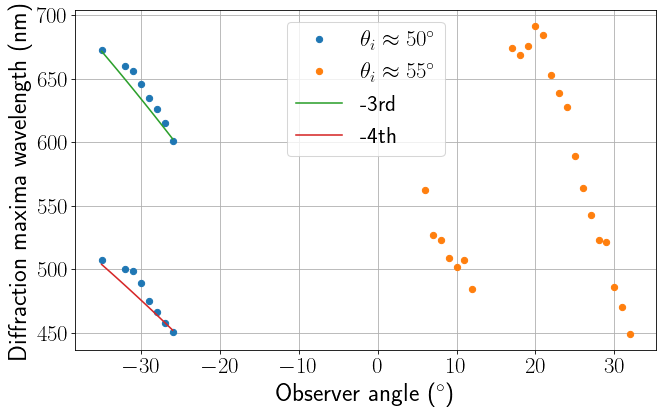

In [41]:
plt.rcParams["figure.figsize"] = (10, 6)

plot_x_45deg = []
plot_y_45deg = []

for angle, maximas in df_45deg_map.items():
    for maxima in maximas:
        if angle < 0:
            plot_x_45deg.append(angle)
            plot_y_45deg.append(maxima)

plot_function_x = np.linspace(np.min(plot_x), np.max(plot_x), 100)

plt.plot(plot_x_45deg, plot_y_45deg, linestyle='None', marker='o', label=r"$\theta_i \approx 50^\circ$")
plt.plot(plot_x, plot_y, linestyle='None', marker='o', label=r"$\theta_i \approx 55^\circ$")

plt.xlabel("Observer angle ($^\circ$)")
plt.ylabel("Diffraction maxima wavelength (nm)")

plt.grid()

plt.plot(np.linspace(-26, -35, 100), lambda_angle(np.linspace(-26, -35, 100), 48, -3) * 1e9, label='-3rd')
plt.plot(np.linspace(-26, -35, 100), lambda_angle(np.linspace(-26, -35, 100), 48, -4) * 1e9, label='-4th')

plt.legend()

plt.savefig("45deg_55deg.png")

# Different observer angle
$0^\circ$, $53^\circ$

In [42]:
import glob

filenames_horiz_55deg = glob.glob("../data/CD/source_angle/55deg/spectrometer_angle/55deg/*.csv")

In [45]:
lambda_angle_phi_0 = lambda x, theta_i, k, phi_0: 1.53e-6 * np.cos(np.pi * phi_0 / 180) * (np.sin(np.pi * x / 180) - np.sin(np.pi * theta_i / 180)) / k

In [46]:
data_horiz_55deg = []
data_horiz_55deg_map = {}

for filename in filenames_horiz_55deg:
    angle_meas = float(filename.split("/")[-1].split('deg')[0])

    angle = 90 - angle_meas if angle_meas > 0 else -90 - angle_meas

    df = pd.read_csv(filename)
    # df['intensity'] = savgol_filter(df['intensity'], 10, 2)
    data_horiz_55deg.append([angle, df])
    data_horiz_55deg_map[angle] = df

In [47]:
from scipy.signal import find_peaks

df_horiz_55deg_map = {}

for field in data_horiz_55deg:
    angle = field[0]
    df = field[1]
    if angle > 0:
        peaks = [np.argmax(df['intensity'])]
    else:
        peaks, _ = find_peaks(df['intensity'], prominence=2, height=5, distance=70)

    df_horiz_55deg_map[angle] = df['wavelength'][peaks]

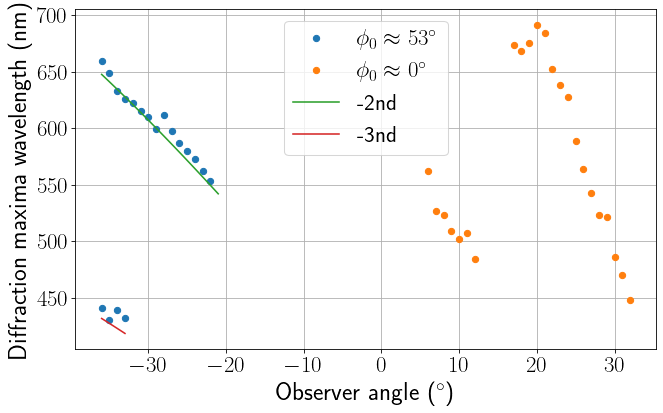

In [48]:
plt.rcParams["figure.figsize"] = (10, 6)

plot_x_df_horiz_55deg_map = []
plot_y_df_horiz_55deg_map = []

for angle, maximas in df_horiz_55deg_map.items():
    for maxima in maximas:
        if angle < 0:
            plot_x_df_horiz_55deg_map.append(angle)
            plot_y_df_horiz_55deg_map.append(maxima)

plot_function_x = np.linspace(np.min(plot_x), np.max(plot_x), 100)

plt.plot(plot_x_df_horiz_55deg_map, plot_y_df_horiz_55deg_map, linestyle='None', marker='o', label=r"$\phi_0 \approx 53^\circ$")
plt.plot(plot_x, plot_y, linestyle='None', marker='o', label=r"$\phi_0 \approx 0^\circ$")

plt.plot(np.linspace(-21, -36, 100), lambda_angle_phi_0(np.linspace(-21, -36, 100), 55, -2, 53) * 1e9, label='-2nd')
plt.plot(np.linspace(-33, -36, 100), lambda_angle_phi_0(np.linspace(-33, -36, 100), 55, -3, 53) * 1e9, label='-3nd')

plt.grid()

plt.legend()

plt.xlabel("Observer angle ($^\circ$)")
plt.ylabel("Diffraction maxima wavelength (nm)")

plt.savefig("observer_source.png")

# DVD
$\phi_0 = 53^\circ$, $\theta_i = 55^\circ$

In [50]:
import glob

filenames_DVD = glob.glob("../data/DVD/*.csv")

In [51]:
lambda_angle_DVD = lambda x, theta_i, k, phi_0: 0.8e-6 * np.cos(np.pi * phi_0 / 180) * (
            np.sin(np.pi * x / 180) - np.sin(np.pi * theta_i / 180)) / k

In [52]:
data_DVD = []
data_DVD_map = {}

for filename in filenames_DVD:
    angle_meas = float(filename.split("/")[-1].split('deg')[0])

    angle = 90 - angle_meas if angle_meas > 0 else -90 - angle_meas

    df = pd.read_csv(filename)
    # df['intensity'] = savgol_filter(df['intensity'], 10, 2)
    data_DVD.append([angle, df])
    data_DVD_map[angle] = df

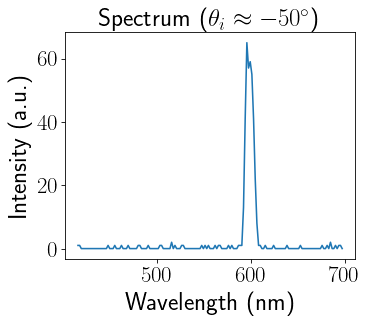

In [53]:
plt.rcParams["figure.figsize"] = (5, 4)
plt.plot(data_DVD_map[-50]['wavelength'], data_DVD_map[-50]['intensity'])
plt.xlabel('Wavelength (nm)')
plt.ylabel('Intensity (a.u.)')
plt.title("Spectrum ($\\theta_i \\approx -50^\\circ$)")
plt.savefig("spectrum_DVD.png", bbox_inches='tight')

In [54]:
from scipy.signal import find_peaks

df_DVD_map = {}

for field in data_DVD:
    angle = field[0]
    df = field[1]
    if angle > 0:
        peaks = [np.argmax(df['intensity'])]
    else:
        peaks, _ = find_peaks(df['intensity'], prominence=2, height=5, distance=70)

    df_DVD_map[angle] = df['wavelength'][peaks]

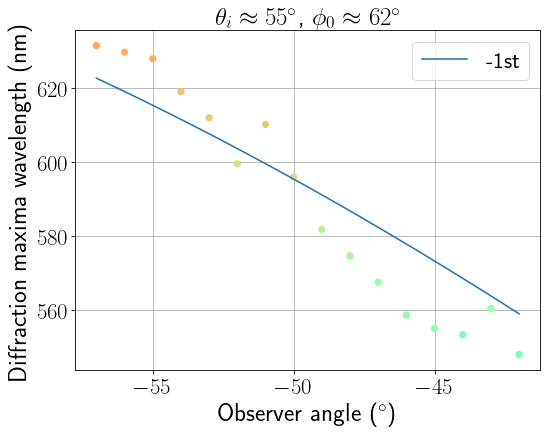

In [55]:
plt.rcParams["figure.figsize"] = (8, 6)

plot_x_DVD = []
plot_y_DVD = []

for angle, maximas in df_DVD_map.items():
    for maxima in maximas:
        if angle < 0:
            plot_x_DVD.append(angle)
            plot_y_DVD.append(maxima)

plt.plot(plot_x_DVD, plot_y_DVD, linestyle='None', marker='None', color='black', zorder=1)
plt.scatter(plot_x_DVD, plot_y_DVD, c=plot_y_DVD, cmap="rainbow", vmin=400, vmax=700, zorder=2)

plt.grid()

plt.plot(np.linspace(-42, -57, 100), lambda_angle_DVD(np.linspace(-42, -57, 100), 55, -1, 62) * 1e9, label='-1st')
plt.legend()

plt.title(r"$\theta_i \approx 55^\circ$, $\phi_0 \approx 62^\circ$")

plt.xlabel("Observer angle ($^\circ$)")
plt.ylabel("Diffraction maxima wavelength (nm)")

plt.savefig("DVD.png")